# Problem Statement

Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [3]:
Sales = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [4]:
Sales.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
Sales.shape

(42, 2)

In [6]:
Sales.size

84

In [7]:
Sales.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [9]:
#Checking for null values
Sales.isnull()

,Quarter,Sales
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [10]:
Sales.isnull().any()

Quarter    False
Sales      False
dtype: bool

In [11]:
Sales.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<b>No Null values.</b>

In [12]:
#Checking Duplicate values.
Sales.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
dtype: bool

In [13]:
Sales.duplicated().sum()

0

In [14]:
Sales[Sales.duplicated()]

,Quarter,Sales


<b>No Duplicate Values</b>

In [15]:
#Unique values
Sales.nunique()

Quarter    42
Sales      42
dtype: int64

In [16]:
df = Sales.copy()

In [17]:
#Clean way to convert quarterly periods to datetime in pandas
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [18]:
df.head()

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [19]:
# converting into datetime formate as the index was not in correct formate.
df['date'] = (
    pd.to_datetime(
        df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))

In [20]:
df.head()

,Quarter,Sales,Quarter_Year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Quarter       42 non-null     object        
 1   Sales         42 non-null     float64       
 2   Quarter_Year  42 non-null     object        
 3   date          42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


In [22]:
# droping the Column Quarter and Quarter_Year from the data set as we had get our required ate time column 
# and no need for object coumn
df.drop(columns=['Quarter','Quarter_Year'],inplace=True)

In [23]:
df.head()

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01


In [24]:
df.set_index('date',inplace=True)

In [25]:
df.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [26]:
DF= df.copy()

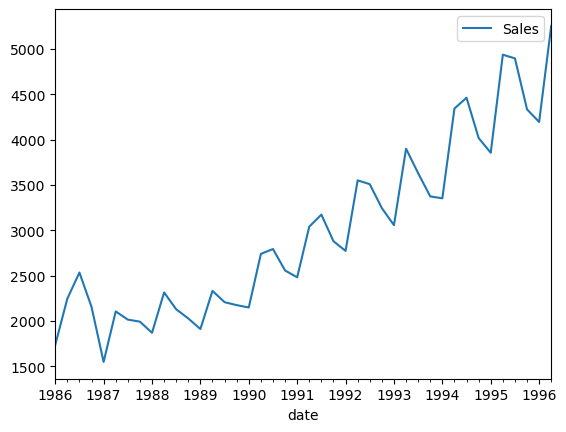

In [27]:
DF.plot()
plt.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

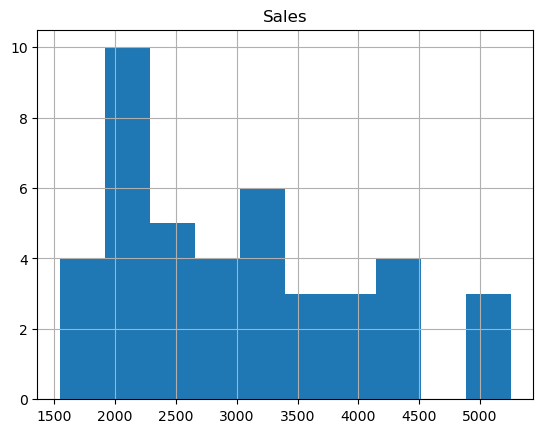

In [28]:
DF.hist()

<AxesSubplot:ylabel='Density'>

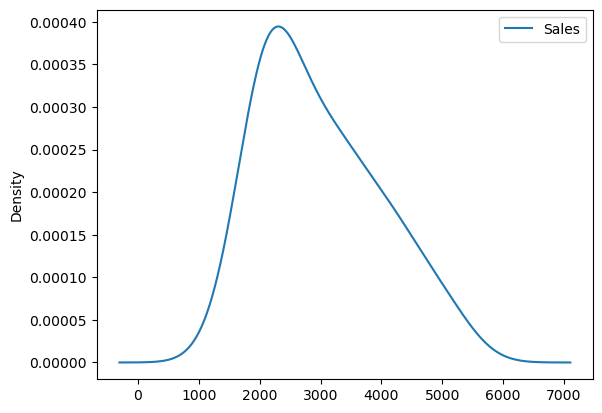

In [29]:
DF.plot(kind='kde')

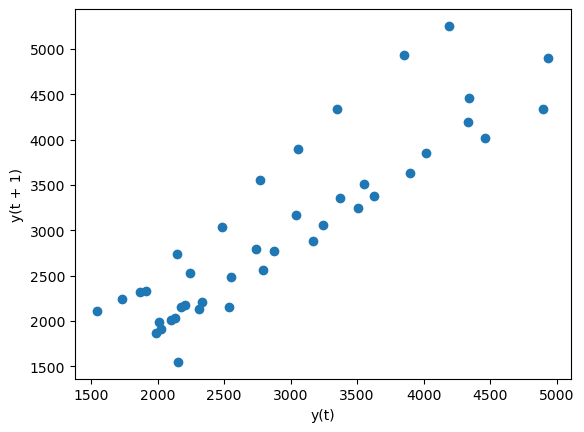

In [30]:
from pandas.plotting import lag_plot
#Lag_plot
lag_plot(DF)
plt.show()

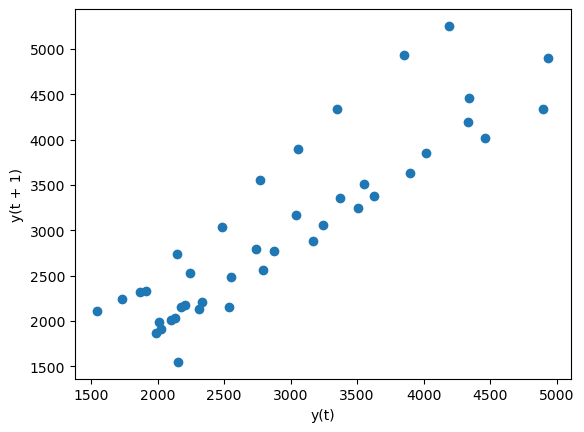

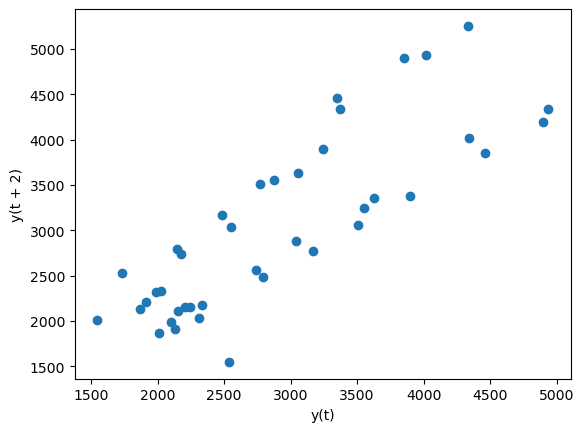

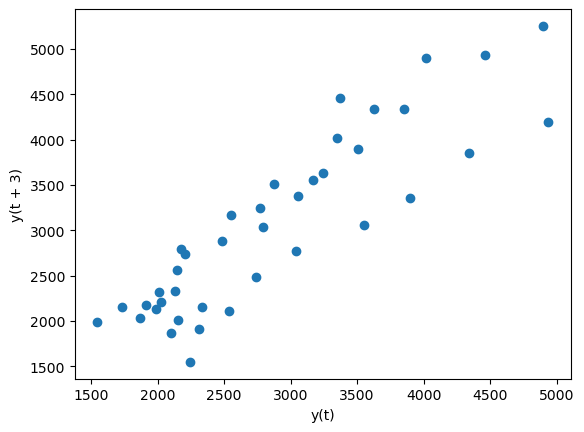

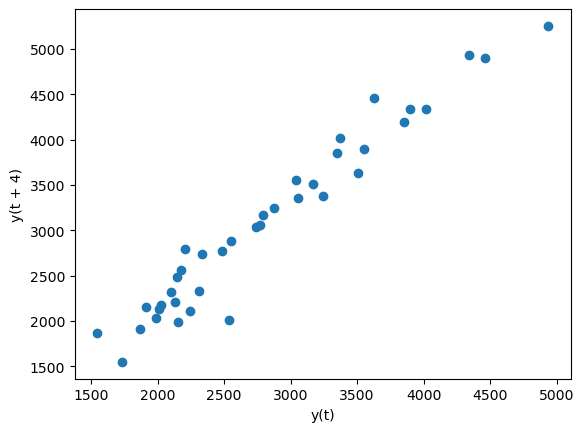

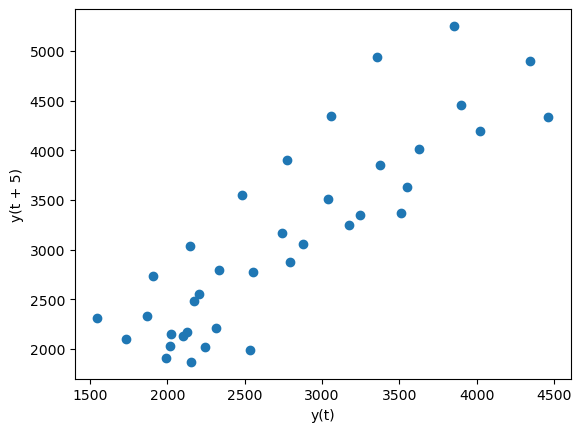

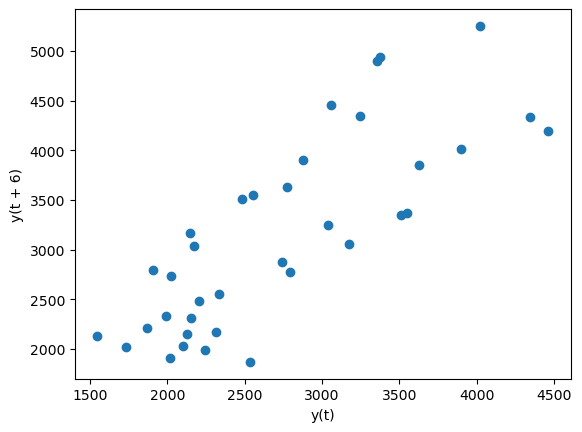

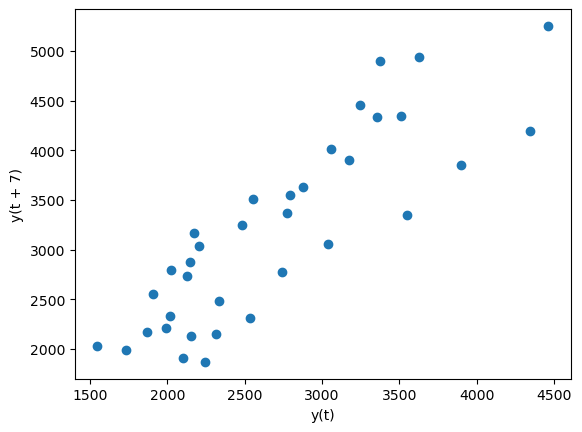

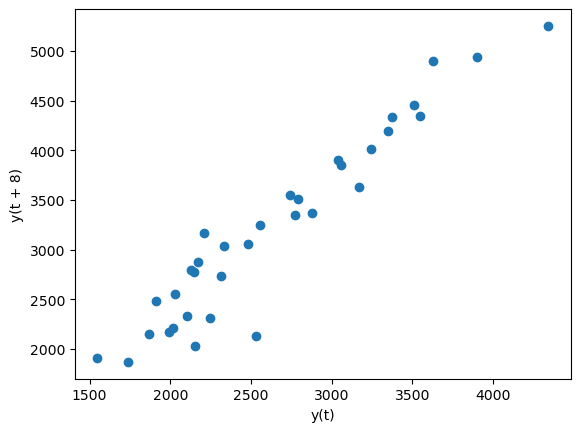

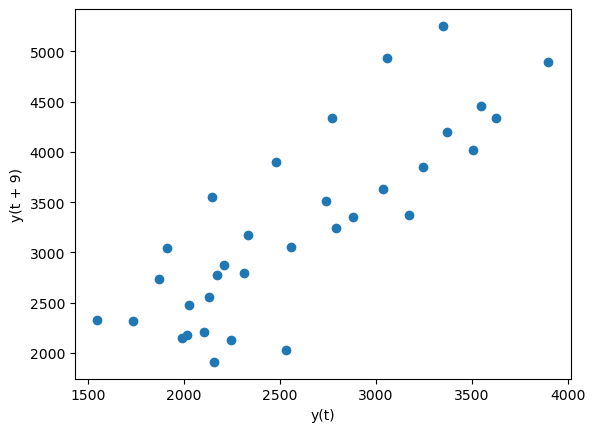

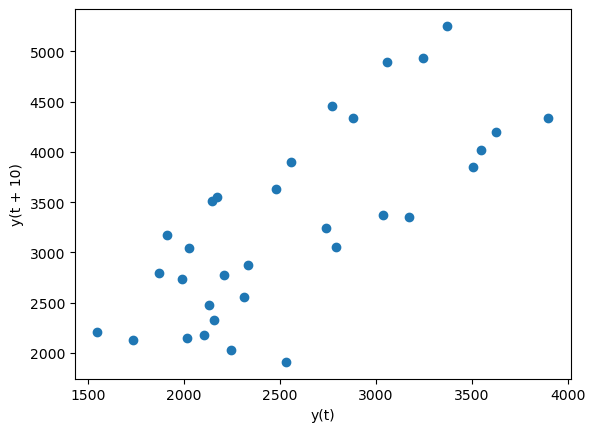

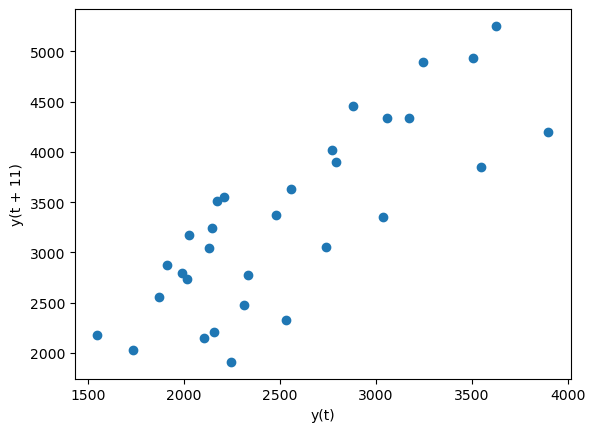

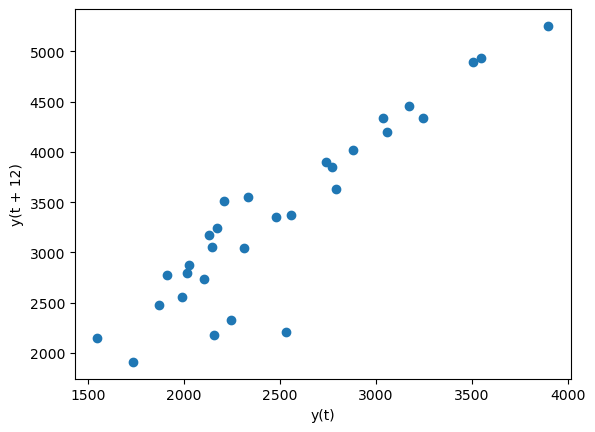

In [31]:
for i in range (1, 13):
    lag_plot(DF, lag=i)
    plt.show()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

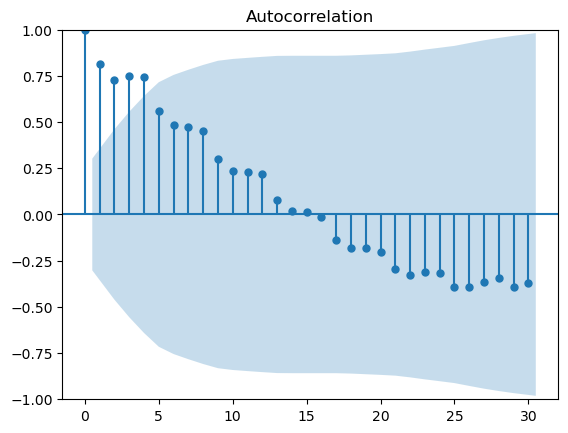

In [33]:
plot_acf(DF, lags=30)
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


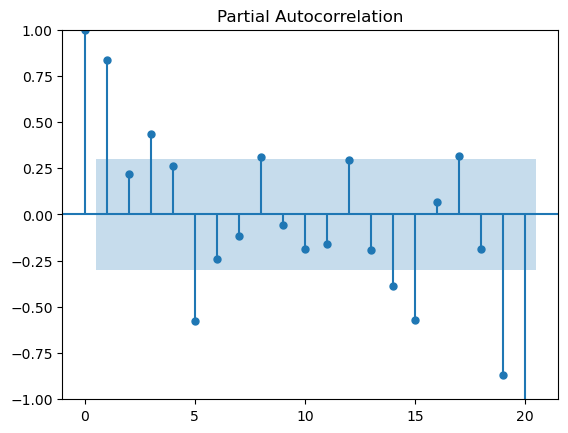

In [34]:
plot_pacf(DF, lags=20)
plt.show()

# Upsampling

In [35]:
upsampled = DF.resample('M').mean()
print(upsampled.head(32))

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN
1987-04-30  2104.411995
1987-05-31          NaN
1987-06-30          NaN
1987-07-31  2014.362999
1987-08-31          NaN
1987-09-30          NaN
1987-10-31  1991.746998
1987-11-30          NaN
1987-12-31          NaN
1988-01-31  1869.049999
1988-02-29          NaN
1988-03-31          NaN
1988-04-30  2313.631996
1988-05-31          NaN
1988-06-30          NaN
1988-07-31  2128.320000
1988-08-31          NaN


In [36]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(15))

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


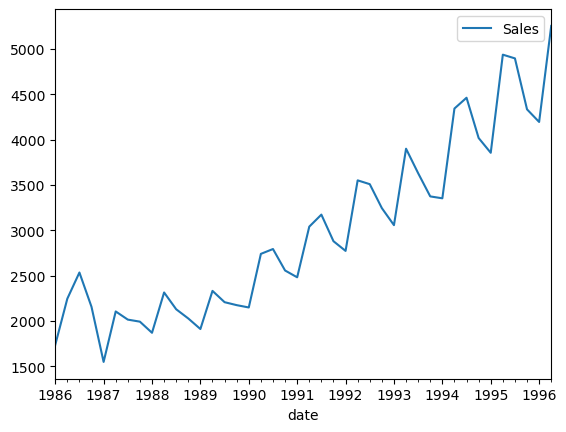

In [37]:
interpolated.plot()
plt.show()

In [38]:
interpolated

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


# Transformations

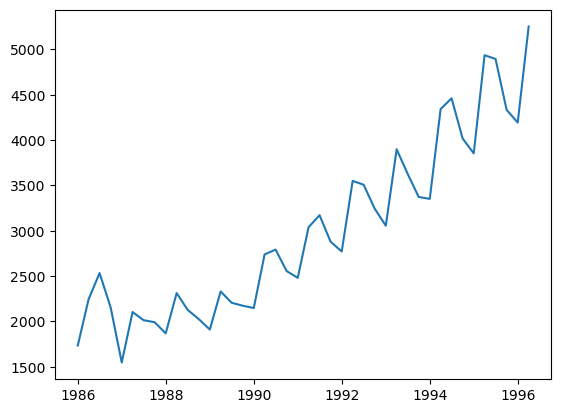

In [39]:
plt.plot(DF)

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

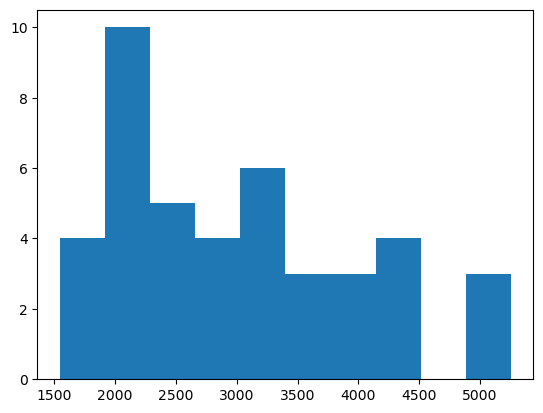

In [40]:
plt.hist(DF)

# Square Root Transformation

In [42]:
from numpy import sqrt

In [43]:
dataframe = pd.DataFrame(DF.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales'])

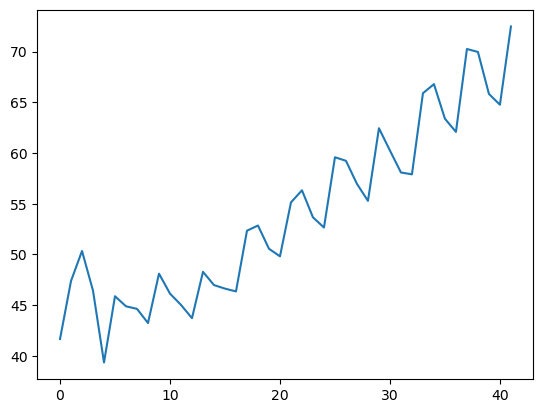

In [45]:
plt.plot(dataframe)

(array([2., 6., 8., 4., 5., 4., 5., 3., 2., 3.]),
 array([39.34233085, 42.65585604, 45.96938123, 49.28290641, 52.5964316 ,
        55.90995679, 59.22348198, 62.53700717, 65.85053236, 69.16405755,
        72.47758274]),
 <BarContainer object of 10 artists>)

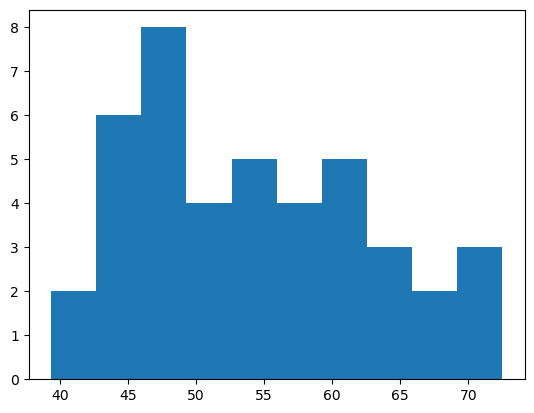

In [46]:
plt.hist(dataframe)

# Log Transformation

In [47]:
from  numpy import log

In [48]:
dataframe = pd.DataFrame(DF.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = log(dataframe['Sales'])

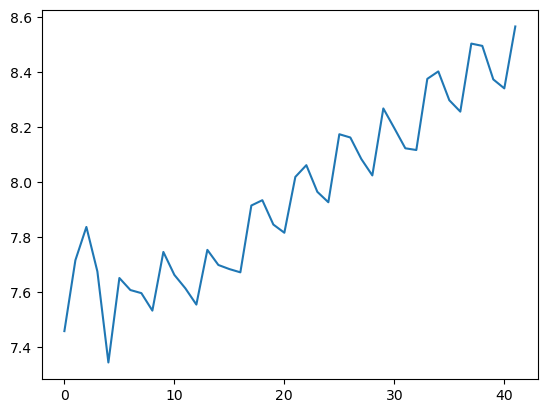

In [49]:
plt.plot(dataframe)

(array([2., 2., 9., 4., 5., 4., 6., 3., 4., 3.]),
 array([7.34460212, 7.46679737, 7.58899262, 7.71118787, 7.83338312,
        7.95557837, 8.07777362, 8.19996887, 8.32216412, 8.44435937,
        8.56655462]),
 <BarContainer object of 10 artists>)

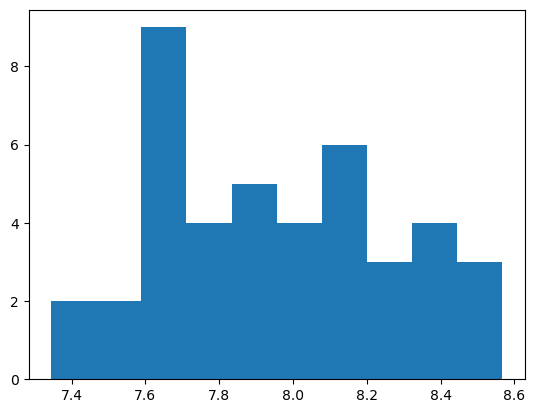

In [50]:
plt.hist(dataframe)

In [51]:
Train = interpolated.head(112)
Test = interpolated.tail(12)

# Moving Average

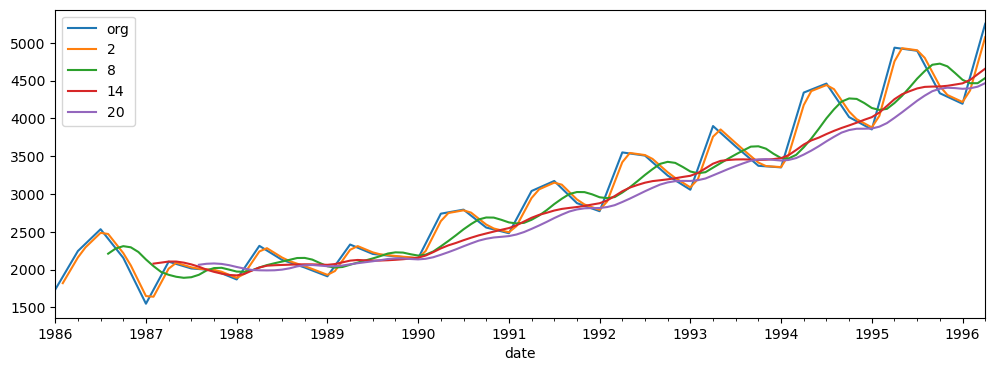

In [52]:
plt.figure(figsize=(12,4))
interpolated.Sales.plot(label="org")
for i in range(2,24,6):
    interpolated["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time Series Decomposition Plot

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

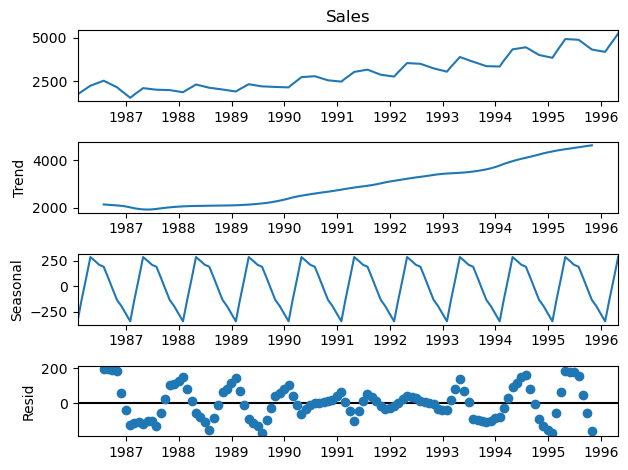

In [54]:
decompose_ts_add = seasonal_decompose(interpolated.Sales)
decompose_ts_add.plot()
plt.show()

# ACF and PACF plots

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


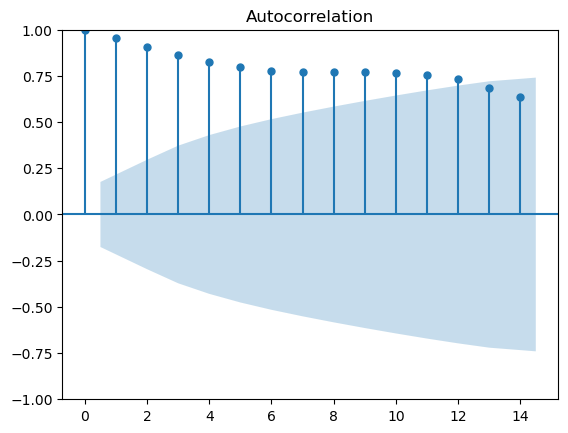

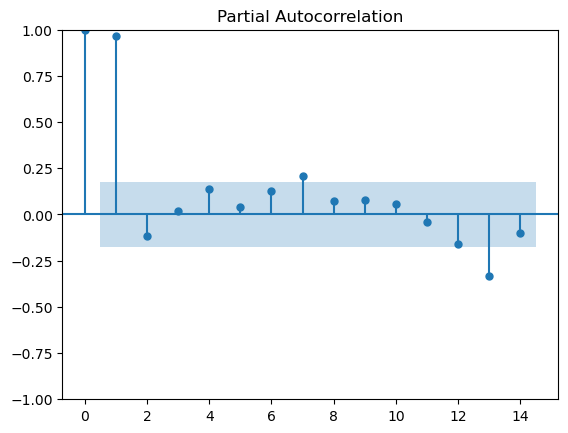

In [57]:
plot_acf(interpolated.Sales, lags=14)
plot_pacf(interpolated.Sales, lags=14)
plt.show()

# Evaluation Metric MAPE

In [61]:
def Mape(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [62]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [63]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_ses,Test.Sales)

7.528920151221705

In [65]:
rmse_ses = sqrt(mean_squared_error(pred_ses,Test.Sales))
rmse_ses

464.48125073131905

# Holt Method

In [66]:
from statsmodels.tsa.holtwinters import Holt

In [68]:
h_model = Holt(Train["Sales"]).fit(smoothing_level=0.1, smoothing_trend=0.2)
pred_h = h_model.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h,Test.Sales)

7.971543678992597

In [69]:
rmse_h = sqrt(mean_squared_error(pred_h,Test.Sales))
rmse_h

406.71890406225725

# Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [71]:
h_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_h_add_add = h_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h_add_add,Test.Sales)

4.981173368625854

In [73]:
rmse_h_add_add = sqrt(mean_squared_error(pred_h_add_add,Test.Sales))
rmse_h_add_add

254.55673697907423

# Holt Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend

In [74]:
h_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_h_mul_add = h_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h_mul_add,Test.Sales)

4.767970177075724

In [75]:
rmse_h_mul_add = sqrt(mean_squared_error(pred_h_mul_add,Test.Sales))
rmse_h_mul_add

250.3354635902686

# Holt Winter Exponential Smoothing with Additive Seasonality and Multiplicative Trend

In [76]:
h_model_add_mul = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_h_add_mul = h_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h_add_mul,Test.Sales)

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


6.375892212476569

In [78]:
rmse_h_add_mul = sqrt(mean_squared_error(pred_h_add_mul,Test.Sales))
rmse_h_add_mul

335.8812803439466

# Holt Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend

In [79]:
h_model_mul_mul = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_h_mul_mul = h_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h_mul_mul,Test.Sales)

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


6.8192060620298305

In [80]:
rmse_h_mul_mul = sqrt(mean_squared_error(pred_h_mul_mul,Test.Sales))
rmse_h_mul_mul

352.8843133849385

# Final Model by combining Train and Test

In [81]:
h_model_mul_add = ExponentialSmoothing(interpolated["Sales"],seasonal="mul",trend="add",seasonal_periods=10).fit()

In [82]:
#Forecasting for next 10 time periods
h_model_mul_add.forecast(10)

1996-05-31    5589.251624
1996-06-30    5936.452447
1996-07-31    6229.562070
1996-08-31    6528.098060
1996-09-30    6738.617231
1996-10-31    7065.145940
1996-11-30    7320.164585
1996-12-31    7777.755222
1997-01-31    8088.769932
1997-02-28    8470.078380
Freq: M, dtype: float64

In [85]:
interpolated

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [86]:
interpolated.reset_index(inplace=True)

In [87]:
interpolated['t'] = 1

In [88]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

C:\Users\Yadnyeshwar\AppData\Local\Temp\ipykernel_13388\4068087303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1


In [89]:
interpolated

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,2
2,1986-03-31,2074.916332,3
3,1986-04-30,2244.960999,4
4,1986-05-31,2341.242330,5
...,...,...,...
119,1995-12-31,4240.333333,120
120,1996-01-31,4194.000000,121
121,1996-02-29,4547.000000,122
122,1996-03-31,4900.000000,123


In [90]:
interpolated['t_sq'] = (interpolated['t'])**2

In [91]:
interpolated

,date,Sales,t,t_sq
0,1986-01-31,1734.827000,1,1
1,1986-02-28,1904.871666,2,4
2,1986-03-31,2074.916332,3,9
3,1986-04-30,2244.960999,4,16
4,1986-05-31,2341.242330,5,25
...,...,...,...,...
119,1995-12-31,4240.333333,120,14400
120,1996-01-31,4194.000000,121,14641
121,1996-02-29,4547.000000,122,14884
122,1996-03-31,4900.000000,123,15129


In [92]:
interpolated["month"] = interpolated.date.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.date.dt.strftime("%Y") # year extraction

In [93]:
interpolated

,date,Sales,t,t_sq,month,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986
2,1986-03-31,2074.916332,3,9,Mar,1986
3,1986-04-30,2244.960999,4,16,Apr,1986
4,1986-05-31,2341.242330,5,25,May,1986
...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995
120,1996-01-31,4194.000000,121,14641,Jan,1996
121,1996-02-29,4547.000000,122,14884,Feb,1996
122,1996-03-31,4900.000000,123,15129,Mar,1996


In [94]:
months = pd.get_dummies(interpolated['month'])

In [95]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,0,1,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,1,0,0,0,0


In [96]:
Coca_Cola = pd.concat([interpolated,months],axis=1)

In [98]:
Coca_Cola.head()

,date,Sales,t,t_sq,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1986-01-31,1734.827000,1,1,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,2,4,Feb,1986,0,0,0,1,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,0,0,0,0,0,1,0,0,0,0
3,1986-04-30,2244.960999,4,16,Apr,1986,1,0,0,0,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,0,0,0,0,1,0,0,0


In [99]:
Coca_Cola['log_sales'] = np.log(Coca_Cola['Sales'])

In [100]:
Coca_Cola

,date,Sales,t,t_sq,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,0,0,0,0,0,1,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,0,0,0,0,1,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,1,0,0,0,0,0,0,0,0,0,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,0,0,0,0,1,0,0,0,0,0,0,0,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,0,0,1,0,0,0,0,0,0,0,0,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,0,0,0,0,0,1,0,0,0,0,8.496990


<AxesSubplot:xlabel='month', ylabel='year'>

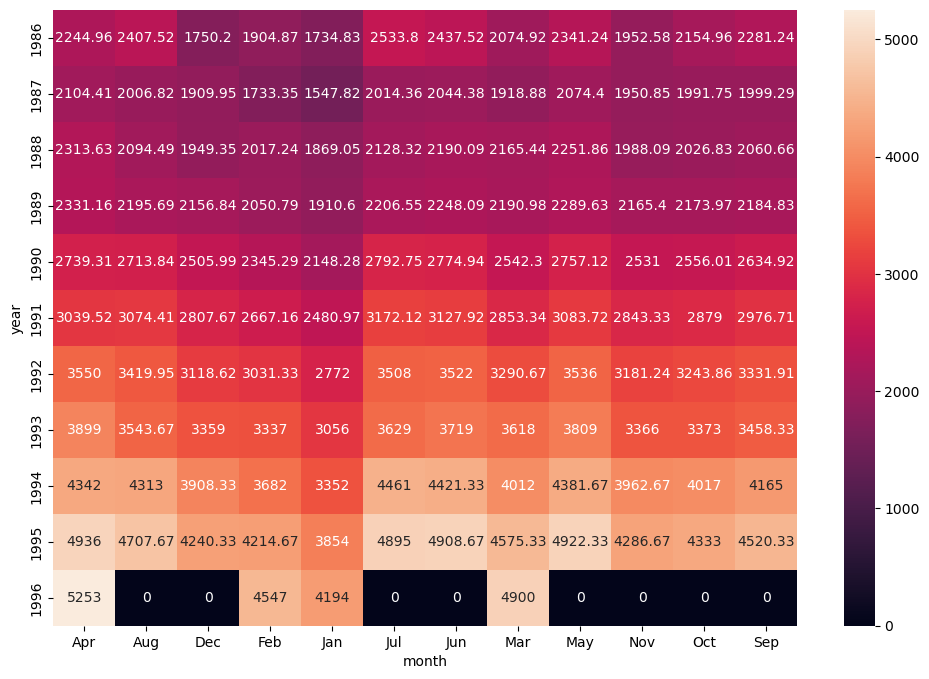

In [101]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Coca_Cola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Sales'>

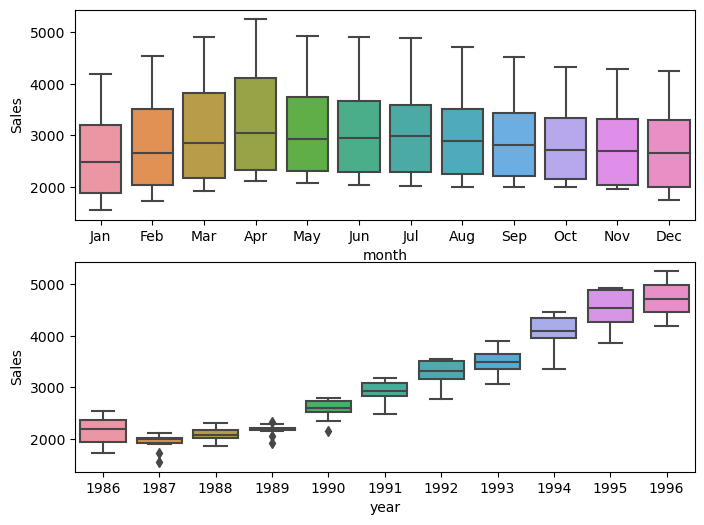

In [103]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data= Coca_Cola)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=Coca_Cola)

<AxesSubplot:xlabel='year', ylabel='Sales'>

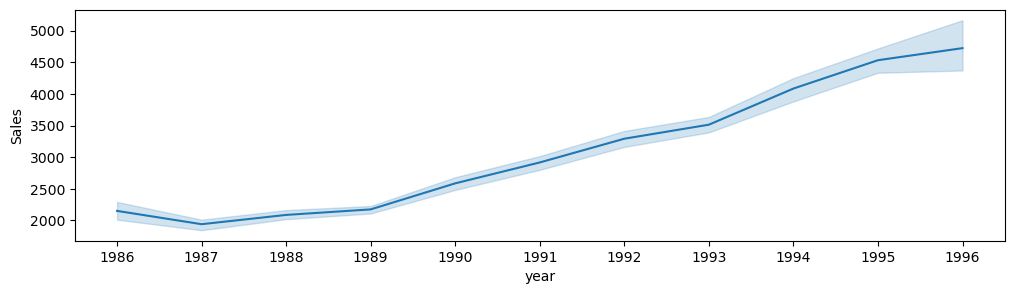

In [105]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=Coca_Cola)

# Splitting data

In [106]:
Train = Coca_Cola.head(110)
Test = Coca_Cola.tail(14) 

In [107]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

638.1208225922802

In [108]:
#Exponential
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

494.4406930545955

In [109]:
#Quadratic 

Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

387.281600829257

In [111]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1881.8135899060226

In [112]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

242.77660443467641

In [113]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1973.262060812315

In [114]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

275.2750321118026

In [115]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,242.776604
6,rmse_Mult_add_sea,275.275032
2,rmse_Quad,387.281601
1,rmse_Exp,494.440693
0,rmse_linear,638.120823
3,rmse_add_sea,1881.813590
5,rmse_Mult_sea,1973.262061


# Additive Seaonality Quadratic model will be prefrred.